### Multi-omic Dataset: Latent representation using Autoencoders
- Load Data
- Normalize Data
- Define, Train and Evaluate Classifier: Random Forest
- Define, Train and Evaluate Classifier: XGBoost
- Define, Train and Evaluate Classifier: DNN models
- Evaluation and Conclusions

In [1]:
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_renal_data = pd.read_csv('./x_exp_renal.csv', sep='\t') # Dataset has Donor ID as first column
y_renal_data = pd.read_csv('./y_renal.csv', sep=',') # Dataset has Donor ID on first column and Label on second column.

from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_renal_data.iloc[:,1:],y_renal_data["label"],test_size=0.2, random_state=1) # Drop the Donor ID column from both datasets
# Normalization of data sets
# Data Scaling MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = X_train
X_test_norm = X_test

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train_norm))
X_test_norm = pd.DataFrame(scaler.transform(X_test_norm))

# We will use "X_train_norm" as training dataset

Best score for training data: 0.979256883186314 

Best C: 0.08 



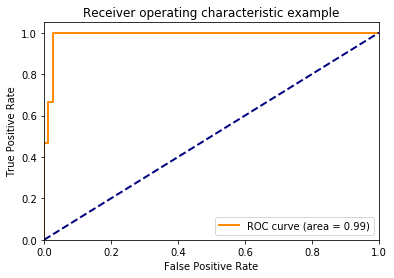

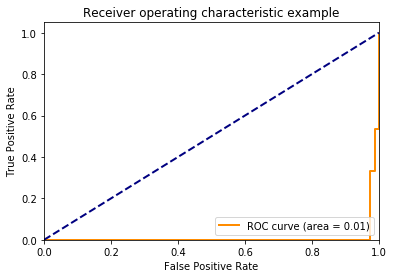

[[77  2]
 [ 0 30]]


              precision    recall  f1-score   support

          -1       1.00      0.97      0.99        79
           1       0.94      1.00      0.97        30

    accuracy                           0.98       109
   macro avg       0.97      0.99      0.98       109
weighted avg       0.98      0.98      0.98       109

Training set score for Logistic Regression: 0.995381
Testing  set score for Logistic Regression: 0.981651


In [19]:
## Logistic Regression Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', dual=False, penalty='l2')

# Perform CV to tune n_estimators for best RFC fit
params_grid = [{'C': [0.07,0.08, 0.085]}]

# Perform Cross Validation Grid Search to find best hyperparamters
clf_grid = GridSearchCV(estimator=clf, param_grid=params_grid, cv=5)
clf_grid.fit(X_train_norm, y_train)

# Print training scores
print('Best score for training data:', clf_grid.best_score_,"\n") 
print('Best C:',clf_grid.best_estimator_.C,"\n") 

# Select the estimator with the best hyperparameters
final_clf = clf_grid.best_estimator_

# Predict classification with final model
y_pred = final_clf.predict(X_test_norm)

y_score = final_clf.decision_function(X_test_norm)
y_proba = final_clf.predict_proba(X_test_norm)


# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
fpr2,tpr2, _ = roc_curve(y_test, y_proba[:,0])
roc_auc = auc(fpr,tpr)
roc_auc2 = auc(fpr2,tpr2)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test,y_pred)

print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for Logistic Regression: %f" % final_clf.score(X_train_norm, y_train))
print("Testing  set score for Logistic Regression: %f" % final_clf.score(X_test_norm  , y_test))

# Best performance with Linear Regression Classifier: 98%

In [17]:
y_proba

array([[5.51045179e-02, 9.44895482e-01],
       [9.98080130e-01, 1.91987018e-03],
       [9.87718351e-01, 1.22816491e-02],
       [9.99766690e-01, 2.33309903e-04],
       [9.46271367e-01, 5.37286326e-02],
       [8.98666930e-03, 9.91013331e-01],
       [9.68661669e-01, 3.13383310e-02],
       [9.96978868e-01, 3.02113167e-03],
       [9.96754093e-01, 3.24590659e-03],
       [9.97637907e-01, 2.36209263e-03],
       [9.88147049e-01, 1.18529514e-02],
       [6.46528213e-02, 9.35347179e-01],
       [9.97533873e-01, 2.46612737e-03],
       [9.81269158e-01, 1.87308421e-02],
       [9.90080168e-01, 9.91983174e-03],
       [9.64625410e-02, 9.03537459e-01],
       [9.86418564e-01, 1.35814364e-02],
       [1.55000780e-03, 9.98449992e-01],
       [9.74409781e-01, 2.55902193e-02],
       [9.88140829e-01, 1.18591710e-02],
       [9.93807391e-01, 6.19260895e-03],
       [9.96464950e-01, 3.53505021e-03],
       [9.89896724e-01, 1.01032757e-02],
       [9.99690222e-01, 3.09777562e-04],
       [7.459343

In [7]:
# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

array([0.        , 0.02531646, 1.        ])

Best score for training data: 0.9815824645816627 

Best C: 0.1 

Best Gamma: 0.1 



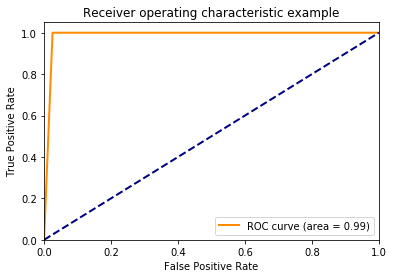

[[77  2]
 [ 0 30]]


              precision    recall  f1-score   support

          -1       1.00      0.97      0.99        79
           1       0.94      1.00      0.97        30

    accuracy                           0.98       109
   macro avg       0.97      0.99      0.98       109
weighted avg       0.98      0.98      0.98       109

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.981651


In [8]:
# First: SVM Classifier with RBF kernel (OS14 Exercise)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

svm = SVC(kernel = 'linear', random_state = 0)

# Perform CV to tune parameters for best SVM fit
params_grid = [{'gamma': [1e-1],
                     'C': [0.01,0.1]}]

# Perform Cross Validation Grid Search to find best hyperparamters
svm_grid = GridSearchCV(estimator=svm, param_grid=params_grid, cv=5)
svm_grid.fit(X_train_norm, y_train)

# Print training scores
print('Best score for training data:', svm_grid.best_score_,"\n") 
print('Best C:',svm_grid.best_estimator_.C,"\n") 
print('Best Gamma:',svm_grid.best_estimator_.gamma,"\n")

# Select the estimator with the best hyperparameters
final_svm = svm_grid.best_estimator_

# Predict classification with final model
y_pred = final_svm.predict(X_test_norm)

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test,y_pred)

print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_svm.score(X_train_norm, y_train))
print("Testing  set score for SVM: %f" % final_svm.score(X_test_norm  , y_test))

In [12]:
# Random Forest Classifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, class_weight="balanced_subsample") # try class_weights "balanced" and "balanced_subsample"

# Perform CV to tune n_estimators for best RFC fit
params_grid = [{'n_estimators': [110, 120, 140], 'max_depth':[12,13,14]}]

# Perform Cross Validation Grid Search to find best hyperparamters
rfc_grid = GridSearchCV(estimator=rfc, param_grid=params_grid, cv=5)
rfc_grid.fit(X_train_norm, y_train)

# Print training scores
print('Best score for training data:', rfc_grid.best_score_,"\n") 
print('Best #estimators:',rfc_grid.best_estimator_.n_estimators,"\n") 
print('Best max depth:',rfc_grid.best_estimator_.max_depth,"\n") 

# Select the estimator with the best hyperparameters
final_rfc = rfc_grid.best_estimator_

# Predict classification with final model
y_pred = final_rfc.predict(X_test_norm)

from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0, n_estimators=120, max_depth=13))

y_score = classifier.fit(X_train_norm, y_train).decision_function(X_test)

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test,y_pred)

print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for RFC: %f" % final_rfc.score(X_train_norm, y_train))
print("Testing  set score for RFC: %f" % final_rfc.score(X_test_norm  , y_test))

# Best performance with Random Forest Classifier: 97%

Best score for training data: 0.9769580326116012 

Best #estimators: 140 

Best max depth: 12 



AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [9]:
import xgboost as xgb
y_train_0 = y_train + 1
y_test_0 = y_test + 1
xg_train = xgb.DMatrix(X_train_norm, label=y_train_0)
xg_test = xgb.DMatrix(X_test_norm, label=y_test_0)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.15
param['max_depth'] = 10
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 3

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 15
bst = xgb.train(param, xg_train, num_round, watchlist)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != y_test_0) / y_test_0.shape[0]
print('Test error using softmax = {}'.format(error_rate))

# do the same thing again, but output probabilities
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist)
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
pred_prob = bst.predict(xg_test).reshape(y_test_0.shape[0], 3)
pred_label = np.argmax(pred_prob, axis=1)
error_rate = np.sum(pred_label != y_test_0) / y_test_0.shape[0]
print('Test error using softprob = {}'.format(error_rate))

cm = confusion_matrix(y_test_0, pred)

print(cm)
print("\n")
print(classification_report(y_test_0,pred))

print("Testing  set score for XGBoost: %f" % ((y_test_0 == pred).sum() / y_test_0.size) )

[0]	train-merror:0.009238	test-merror:0.036697
[1]	train-merror:0.004619	test-merror:0.036697
[2]	train-merror:0.006928	test-merror:0.027523
[3]	train-merror:0.004619	test-merror:0.027523
[4]	train-merror:0	test-merror:0.027523
[5]	train-merror:0	test-merror:0.027523
[6]	train-merror:0	test-merror:0.027523
[7]	train-merror:0	test-merror:0.027523
[8]	train-merror:0	test-merror:0.027523
[9]	train-merror:0	test-merror:0.027523
[10]	train-merror:0	test-merror:0.027523
[11]	train-merror:0	test-merror:0.027523
[12]	train-merror:0	test-merror:0.027523
[13]	train-merror:0	test-merror:0.027523
[14]	train-merror:0	test-merror:0.027523
[15]	train-merror:0	test-merror:0.027523
[16]	train-merror:0	test-merror:0.027523
[17]	train-merror:0	test-merror:0.027523
[18]	train-merror:0	test-merror:0.027523
[19]	train-merror:0	test-merror:0.027523
[20]	train-merror:0	test-merror:0.027523
[21]	train-merror:0	test-merror:0.027523
[22]	train-merror:0	test-merror:0.027523
[23]	train-merror:0	test-merror:0.02752

In [3]:
# DNN Classifier
# One hot encode labels
from sklearn.preprocessing import LabelEncoder
OH_encoder = LabelEncoder()
OH_y_train = pd.DataFrame(OH_encoder.fit_transform(y_train))
OH_y_test = pd.DataFrame(OH_encoder.transform(y_test))
y_train_oh = keras.utils.to_categorical(OH_y_train)
y_test_oh = keras.utils.to_categorical(OH_y_test)

# Callbacks and plot functions
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.legend()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=10, restore_best_weights=True)
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')

In [12]:
# DNN model for classification
# Define Model 1 - Small "shallow" 1-hidden-layer model
def build_model1(dropout, l1,l2):
  model = keras.Sequential([
    layers.Dense(800, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l1_l2(l1,l2), input_shape=[len(X_train_norm.keys())]),
    layers.Dropout(dropout),
    layers.BatchNormalization(),  
    layers.Dense(200,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l1_l2(l1,l2)),
    layers.Dropout(dropout),
    layers.BatchNormalization(),
    layers.Dense(2,activation=tf.nn.softmax)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model = build_model1(0.5,0.0001,0.0001)
EPOCHS = 150
history = model.fit(X_train_norm, y_train_oh, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop, rlrop,PrintDot()])

plot_history(history)

test_loss, test_acc = model.evaluate(np.array(X_test_norm), y_test_oh, verbose=0)
print(test_loss,test_acc)

Train on 346 samples, validate on 87 samples
Epoch 1/150
346/346 [==============================] - 8s 23ms/sample - loss: 13.6019 - accuracy: 0.8266 - val_loss: 11.8866 - val_accuracy: 0.9655
Epoch 2/150
346/346 [==============================] - 6s 17ms/sample - loss: 11.2069 - accuracy: 0.9075 - val_loss: 10.1633 - val_accuracy: 0.9770
Epoch 3/150
346/346 [==============================] - 6s 18ms/sample - loss: 9.5652 - accuracy: 0.9364 - val_loss: 8.5520 - val_accuracy: 0.9655
Epoch 4/150
346/346 [==============================] - 5s 16ms/sample - loss: 8.0525 - accuracy: 0.9306 - val_loss: 7.1923 - val_accuracy: 0.9655
Epoch 5/150
346/346 [==============================] - 6s 18ms/sample - loss: 6.8087 - accuracy: 0.9422 - val_loss: 6.0880 - val_accuracy: 0.9655
Epoch 6/150
346/346 [==============================] - 5s 16ms/sample - loss: 5.7458 - accuracy: 0.9711 - val_loss: 5.2055 - val_accuracy: 0.9885
Epoch 7/150
346/346 [==============================] - 6s 17ms/sample - los

KeyboardInterrupt: 


..........
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
..........
Epoch 00021: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
109/109 [==============================] - 4s 37ms/sample - loss: 4.4362 - accuracy: 0.7248


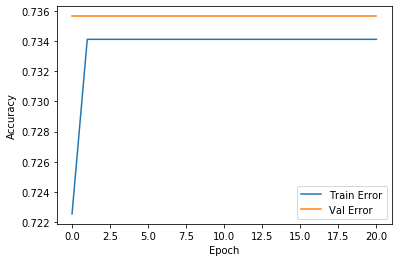

In [15]:
# Define Model 2 - Medium model
def build_model2():
  model = keras.Sequential([
    layers.Dense(8000, activation=tf.nn.relu, input_shape=[len(X_train_norm.keys())]),
    layers.Dense(1000,activation=tf.nn.relu),
    layers.Dense(200,activation=tf.nn.relu),
    layers.Dense(50,activation=tf.nn.relu),
    layers.Dense(2,activation=tf.nn.softmax)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model2 = build_model2()
EPOCHS = 1000
history2 = model2.fit(X_train_norm, y_train_oh, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, rlrop, PrintDot()])

plot_history(history2)
test_loss2, test_acc2 = model2.evaluate(X_test_norm, y_test_oh)

Train on 346 samples, validate on 87 samples
Epoch 1/100
346/346 [==============================] - 6s 16ms/sample - loss: 16.9324 - accuracy: 0.7717 - val_loss: 14.8274 - val_accuracy: 0.9655
Epoch 2/100
346/346 [==============================] - 4s 11ms/sample - loss: 14.1797 - accuracy: 0.8584 - val_loss: 12.4221 - val_accuracy: 0.9655
Epoch 3/100
346/346 [==============================] - 4s 10ms/sample - loss: 11.9629 - accuracy: 0.8468 - val_loss: 10.6344 - val_accuracy: 0.9655
Epoch 4/100
346/346 [==============================] - 4s 13ms/sample - loss: 10.2913 - accuracy: 0.9017 - val_loss: 9.1330 - val_accuracy: 0.9885
Epoch 5/100
346/346 [==============================] - 4s 11ms/sample - loss: 8.7900 - accuracy: 0.9075 - val_loss: 7.7618 - val_accuracy: 0.9770
Epoch 6/100
346/346 [==============================] - 4s 11ms/sample - loss: 7.5033 - accuracy: 0.9364 - val_loss: 6.6572 - val_accuracy: 0.9770
Epoch 7/100
346/346 [==============================] - 4s 11ms/sample - 

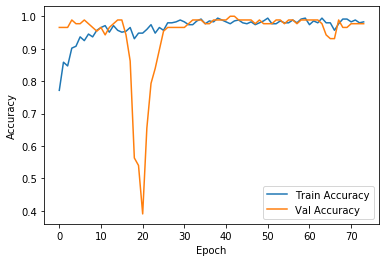

In [5]:
# Define Model 3
def build_model3(dropout: int, l1: int, l2: int):
    model = keras.Sequential([
        layers.Dense(1000, activation=tf.nn.relu ,kernel_regularizer=keras.regularizers.l1_l2(l1,l2), input_shape=[len(X_train_norm.keys())]),
        layers.Dropout(dropout),
        layers.BatchNormalization(),  
        layers.Dense(20,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l1_l2(l1,l2)),
        layers.Dropout(dropout),
        layers.BatchNormalization(),
        layers.Dense(2,activation=tf.nn.softmax)
  ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

model3 = build_model3(0.5,0.0001,0.0001)
EPOCHS = 100
history3 = model3.fit(X_train_norm, y_train_oh, epochs=EPOCHS, batch_size=64,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop, rlrop, PrintDot()])

plot_history(history3)
test_loss3, test_acc3 = model3.evaluate(X_test_norm, y_test_oh)

In [ ]:
## Best model: 0.5, 0.0001,0.0001